# Titanic Kaggle Competition

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

## Exploratory analysis

In [339]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [344]:
train.head(n=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [345]:
target = 'Survived'

In [346]:
test.head(n=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


### Age

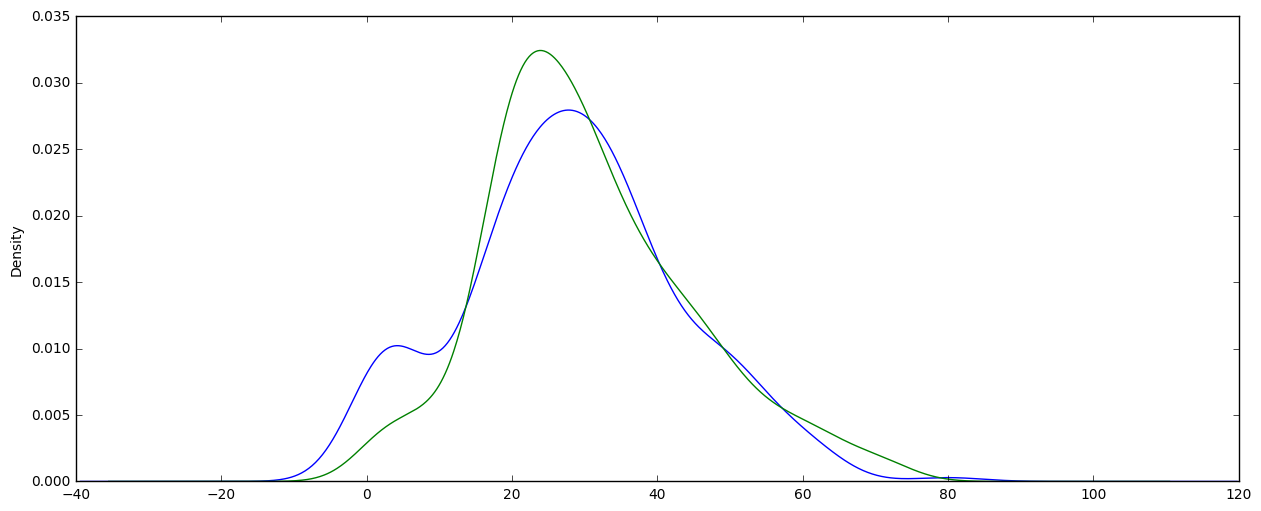

In [347]:
train[train['Survived'] == 1]['Age'].plot.density()
train[train['Survived'] == 0]['Age'].plot.density();

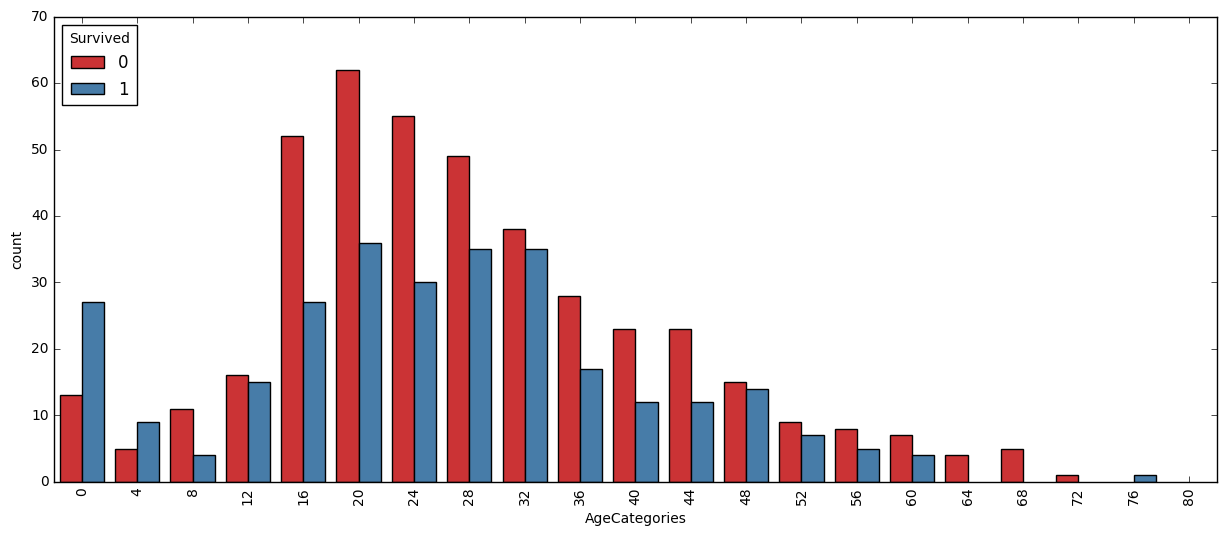

In [348]:
max_age = max(train['Age'])
step = 4
bins = range(0, int(max_age + step + 1), step)
train['AgeCategories'] = pd.cut(train['Age'], bins=bins)
g = sns.countplot(x='AgeCategories', hue='Survived', palette='Set1', data=train)
g.set_xticklabels(rotation=90, labels=bins);

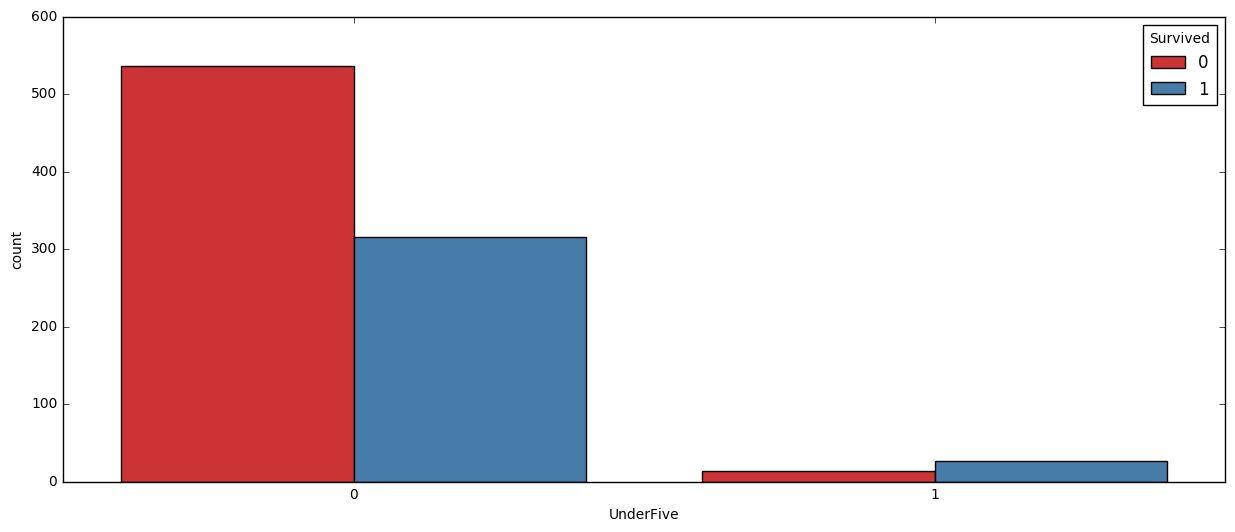

In [349]:
train['UnderFive'] = train['Age'].map(lambda x: 1 if x < 5 else 0)
test['UnderFive'] = test['Age'].map(lambda x: 1 if x < 5 else 0)
sns.countplot(x='UnderFive', hue='Survived', palette='Set1', data=train);

### Cabin

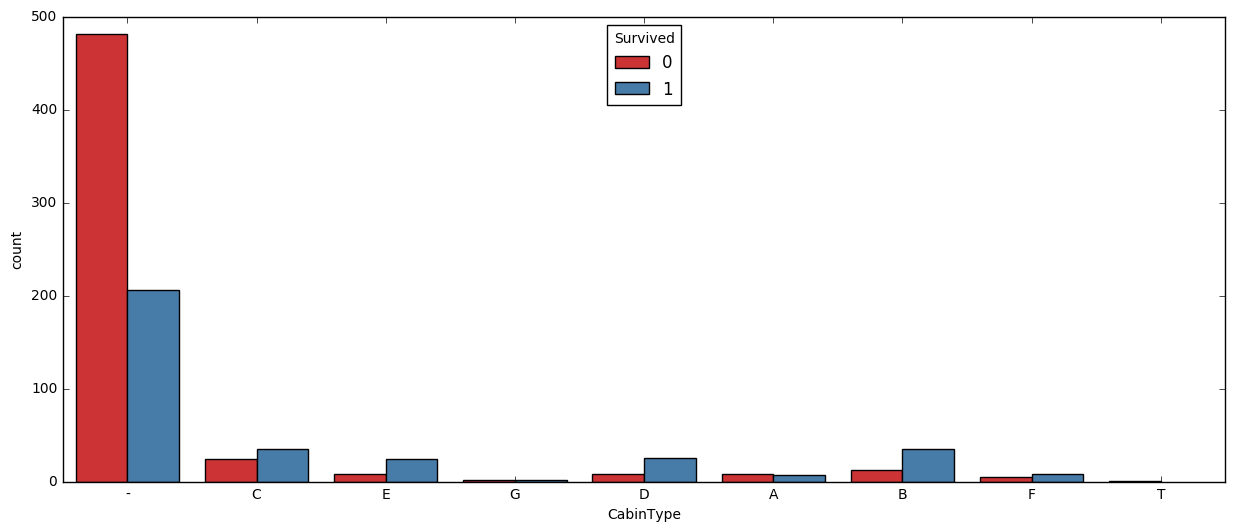

In [350]:
def cabin_type(cabin):
    if type(cabin) == float:
        return "-"
    else:
        return cabin[0]
    
train['CabinType'] = train['Cabin'].map(cabin_type)
test['CabinType'] = test['Cabin'].map(cabin_type)
sns.countplot(x='CabinType', hue='Survived', palette='Set1', data=train);

### Embarked

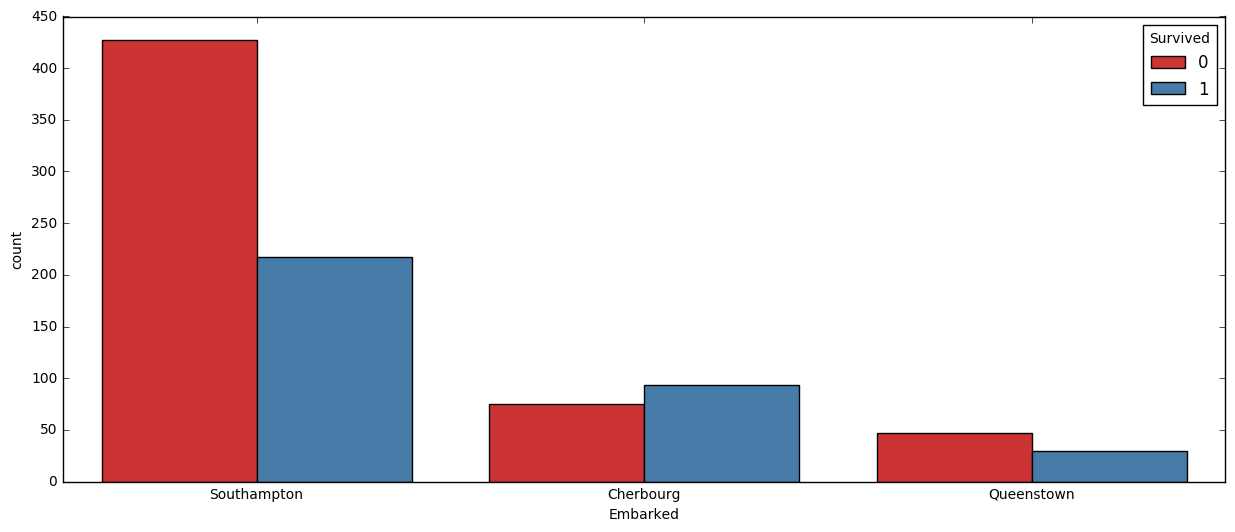

In [351]:
train['Embarked'] = train['Embarked'].map({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'})
test['Embarked'] = test['Embarked'].map({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'})  
sns.countplot(x='Embarked', hue='Survived', palette='Set1', data=train);

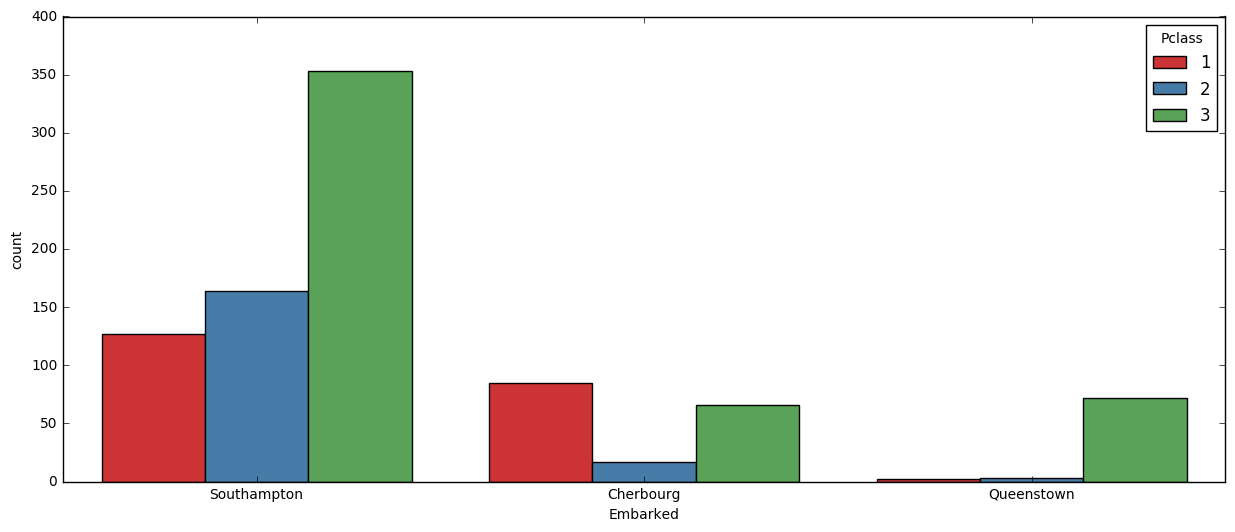

In [352]:
sns.countplot(x='Embarked', hue='Pclass', palette='Set1', data=train);

In [353]:
train = train.drop([e for e in train.Embarked.unique() if type(e) != float], axis=1, errors='ignore')
train = pd.concat([train, pd.get_dummies(train.Embarked)], axis=1)

test = test.drop([e for e in test.Embarked.unique() if type(e) != float], axis=1, errors='ignore')
test = pd.concat([test, pd.get_dummies(test.Embarked)], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategories,UnderFive,CabinType,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,"(20, 24]",0,-,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,"(36, 40]",0,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,"(24, 28]",0,-,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,"(32, 36]",0,C,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,"(32, 36]",0,-,0,0,1


### Passenger Class

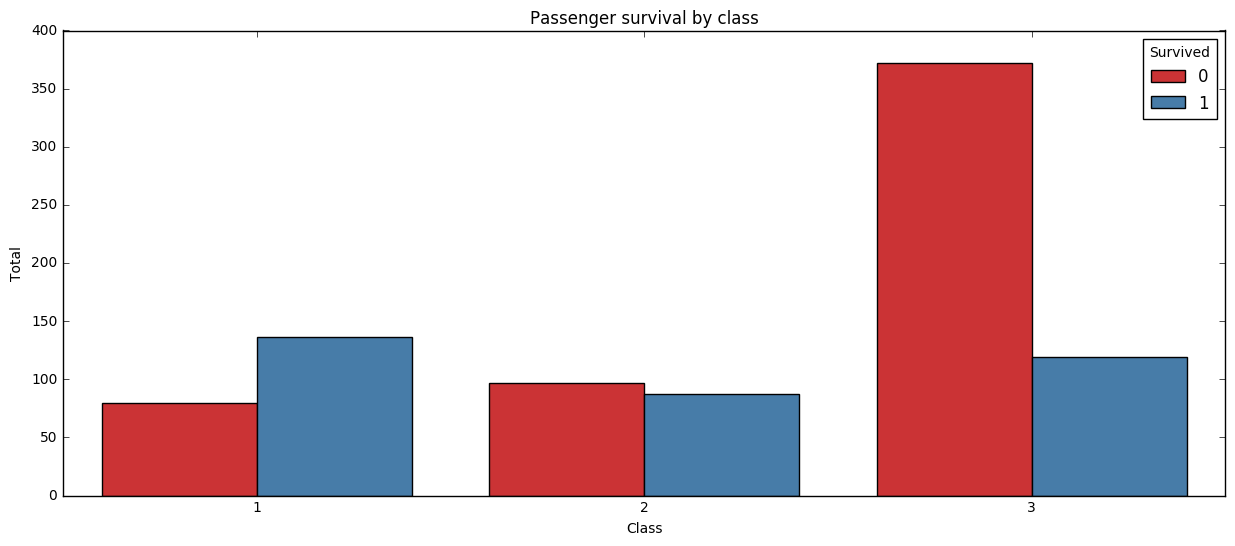

In [354]:
g = sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=train)
g.set(title='Passenger survival by class', xlabel='Class', ylabel='Total');

In [355]:
class_means = train.groupby('Pclass').mean()
class_survival_rate = dict(zip(class_means.index, class_means['Survived']))
train['ClassSurvivalRate'] = train['Pclass'].map(class_survival_rate)
test['ClassSurvivalRate'] = test['Pclass'].map(class_survival_rate)

### Sex

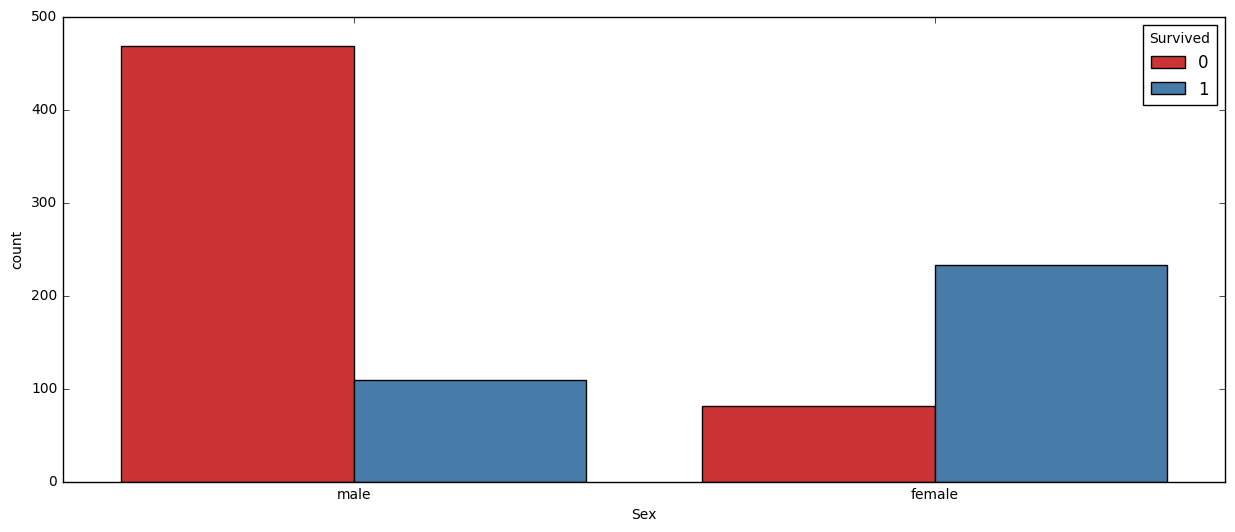

In [356]:
ax = sns.countplot(x='Sex', hue='Survived', palette='Set1', data=train);

In [357]:
train['IsMale'] = train['Sex'].map(lambda x: 1 if x == 'male' else 0)
test['IsMale'] = test['Sex'].map(lambda x: 1 if x == 'male' else 0)

### Siblings

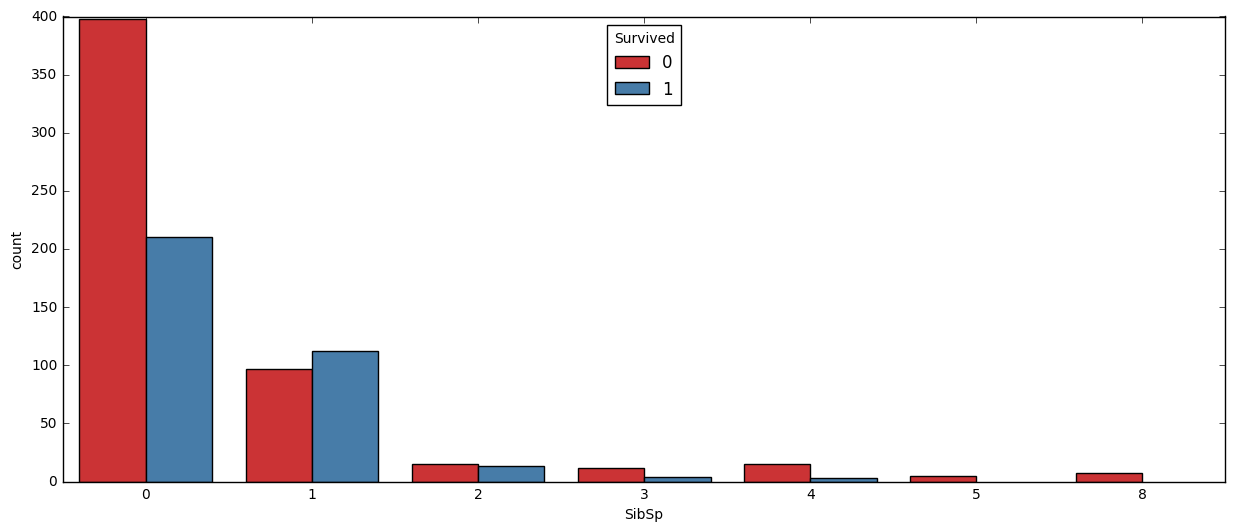

In [358]:
sns.countplot(x='SibSp', hue='Survived', palette='Set1', data=train);

In [359]:
train['SiblingsOnBoard'] = train['SibSp'].map(lambda x: 0 if x == 0 else 1)
test['SiblingsOnBoard'] = test['SibSp'].map(lambda x: 0 if x == 0 else 1) 

### Parents

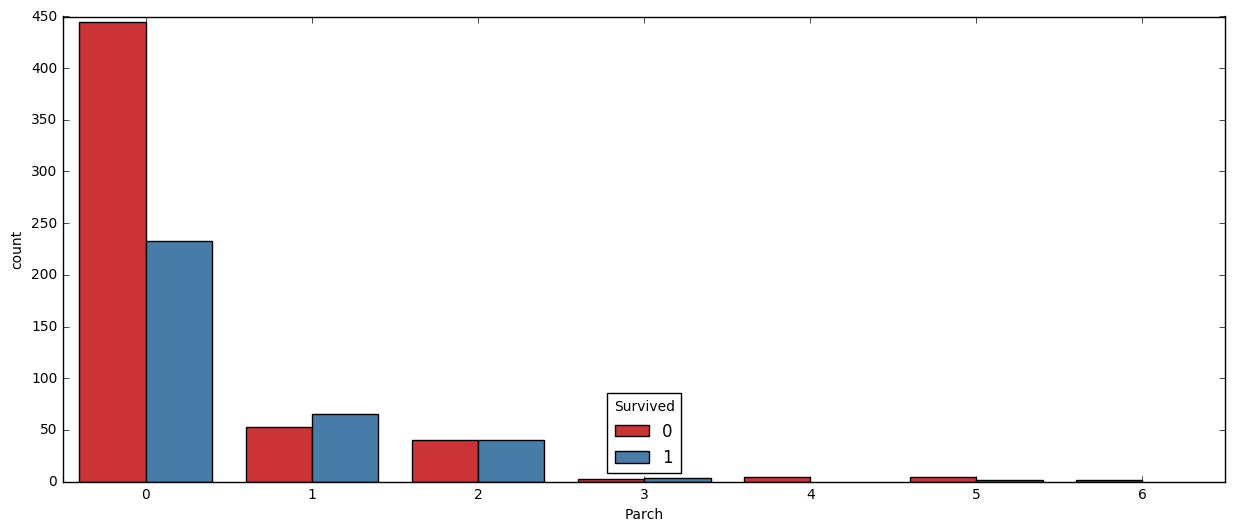

In [360]:
sns.countplot(x='Parch', hue='Survived', palette='Set1', data=train);

In [361]:
train['ParentsOnBoard'] = train['Parch'].map(lambda x: 0 if x == 0 else 1)
test['ParentsOnBoard'] = test['Parch'].map(lambda x: 0 if x == 0 else 1)

## Classification

### Naive Bayes classifier

In [397]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [364]:
features = ['ClassSurvivalRate', 'UnderFive', 'Southampton', 'Cherbourg', 'IsMale', 'SiblingsOnBoard', 'ParentsOnBoard']
train.loc[:, [target] + features].head()

,Survived,ClassSurvivalRate,UnderFive,Southampton,Cherbourg,IsMale,SiblingsOnBoard,ParentsOnBoard
0,0,0.242363,0,1,0,1,1,0
1,1,0.629630,0,0,1,0,1,0
2,1,0.242363,0,1,0,0,0,0
3,1,0.629630,0,1,0,0,1,0
4,0,0.242363,0,1,0,1,0,0


In [401]:
def compute_score(mdl, X, y, train_size=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

    mdl.fit(X_train, y_train)
    
    cs = {label: mdl.coef_[0, i] for i, label in enumerate(features)}
    return {'scores': {'train': mdl.score(X_train, y_train),
                       'test': mdl.score(X_test, y_test)},
            'coefficients': cs,
            'model': mdl}

def compute_score_2(mdl, X, y, train_size=0.8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

    mdl.fit(X_train, y_train)
    
    return {'scores': {'train': mdl.score(X_train, y_train),
                       'test': mdl.score(X_test, y_test)},
            'model': mdl}


def get_normalizer(df, features): 
    return preprocessing.StandardScaler().fit(train.loc[:, features])

In [405]:
s = compute_score_2(RandomForestClassifier(n_estimators=100), X, y, train_size=0.8)
s

{'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 'scores': {'test': 0.77653631284916202, 'train': 0.8412921348314607}}

Mean train score: 0.81111423221
Mean test score: 0.804487895717

Cherbourg: 0.05959627194931218
Southampton: -0.2059908403014901
IsMale: -1.2989578068214402
UnderFive: 0.4401754647868042
SiblingsOnBoard: -0.06780959370009917
ClassSurvivalRate: 0.834510508772686
ParentsOnBoard: -0.10664003408755048


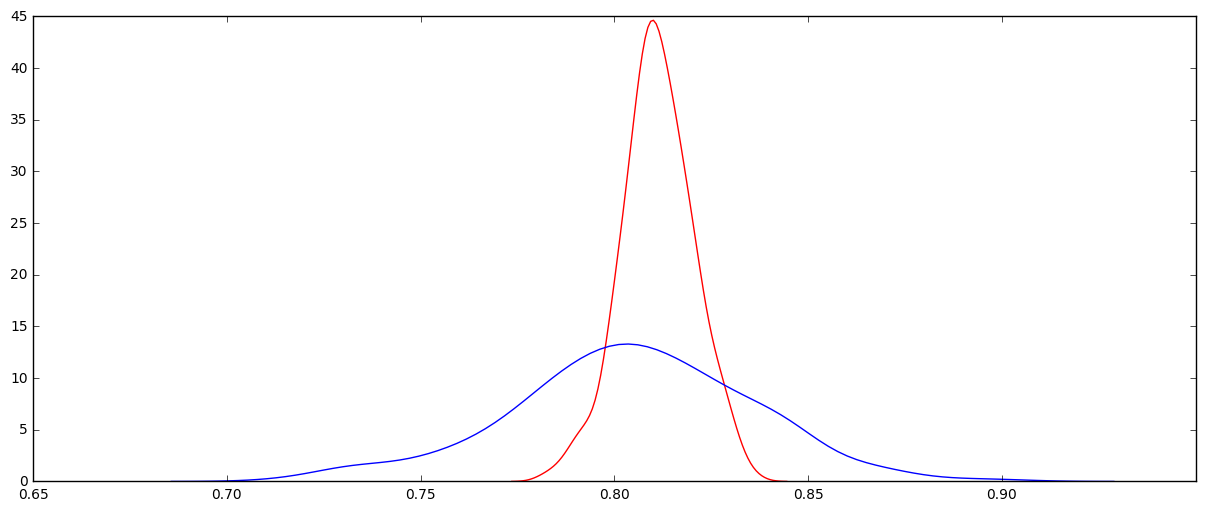

In [400]:
tr = get_normalizer(train, features)
X = tr.transform(train.loc[:, features]) 
y = train.loc[:, target].values
scores = [compute_score(LogisticRegression(), X, y) for _ in range(300)]

test_scores = [s['scores']['test'] for s in scores]
train_scores = [s['scores']['train'] for s in scores]

coefs = {f: [] for f in features}
for s in scores:
    for (f, v) in s['coefficients'].items():
        coefs[f].append(v)

print("Mean train score:", np.mean(train_scores))
print("Mean test score:", np.mean(test_scores))
print()

for (f, vs) in coefs.items():
    print("{}: {}".format(f, np.mean(vs)))

sns.kdeplot(train_scores, legend=True, color='r');
sns.kdeplot(test_scores, color='b');

mdl = scores[-1]['model']

In [394]:
X = tr.transform(test.loc[:, features])
y = mdl.predict(X)
df = pd.DataFrame(test.PassengerId)
df['Survived'] = y
df.to_csv('../predict/submission_1.csv', index=False)

In [395]:
scores[-1]

{'coefficients': {'Cherbourg': -0.0021473962814654167,
  'ClassSurvivalRate': 0.87721334981733312,
  'IsMale': -1.2799303788519363,
  'ParentsOnBoard': -0.07246265361736523,
  'SiblingsOnBoard': -0.040498034937780307,
  'Southampton': -0.20329759223209387,
  'UnderFive': 0.47778849771856174},
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'scores': {'test': 0.83798882681564246, 'train': 0.800561797752809}}

[[95 13]
 [23 48]]


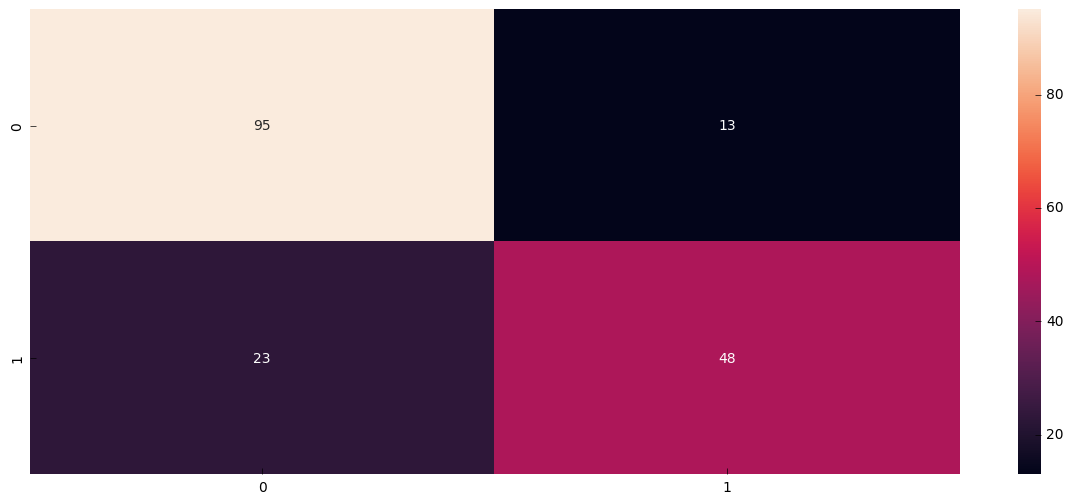

In [135]:
print(confusion_matrix(y_test, mdl.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, mdl.predict(X_test)), annot=True)

In [145]:
mispredictions = data[y != mdl.predict(X)]
mispredictions.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.00,1,0,19943,90.000,C93,S,0
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.00,0,0,237671,13.000,NaN,S,0
751,752,1,3,"Moor, Master. Meier",male,6.00,0,1,392096,12.475,E121,S,1
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000,NaN,S,1
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.250,NaN,Q,0
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.000,D45,S,0
543,544,1,2,"Beane, Mr. Edward",male,32.00,1,0,2908,26.000,NaN,S,0
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.00,0,0,113804,30.500,NaN,S,0
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.550,C22 C26,S,1
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.00,0,0,13213,35.500,A26,C,0


## Decision Tree